In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data= pd.read_csv("/content/sample_data/mnist_train_small.csv", names=["label"]+list(range(1,785)))
test_data= pd.read_csv("/content/sample_data/mnist_test.csv", names=["label"]+list(range(1,785)))

train_data

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'frequency')

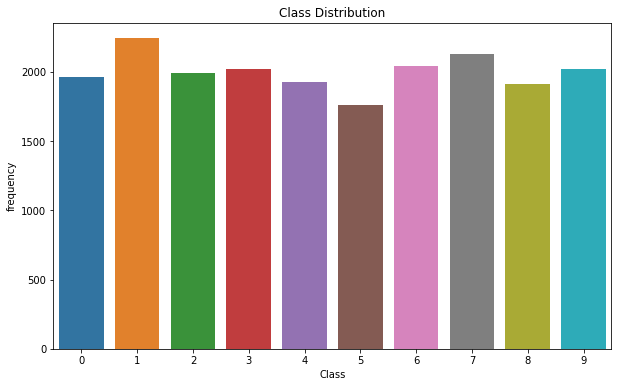

In [ ]:

fig, ax= plt.subplots(figsize=(10,6))
ax=sns.countplot(data=train_data, x="label")
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("frequency")

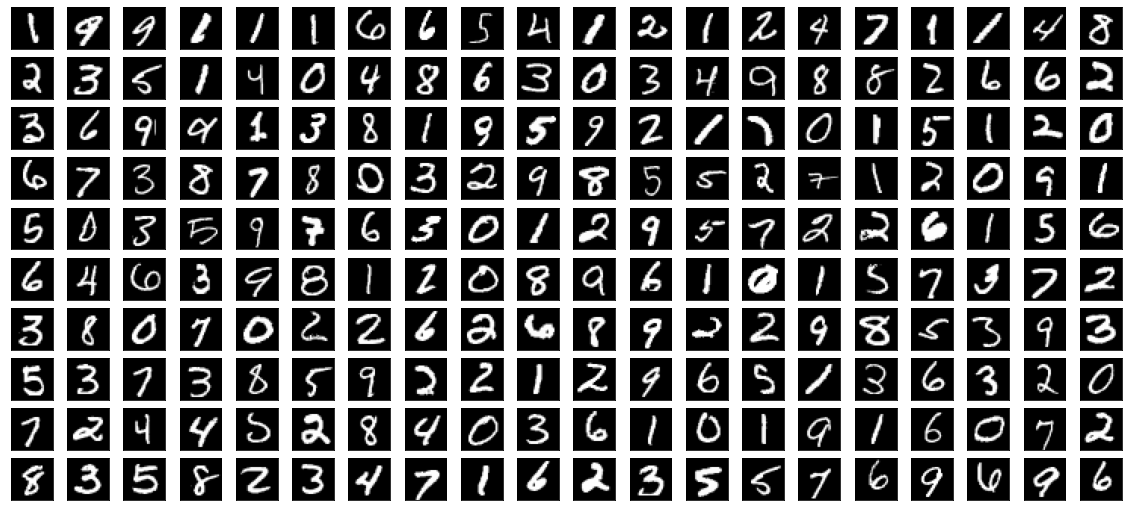

In [ ]:
N=200
images = np.random.randint(low=0, high=len(train_data), size=N).tolist()
    
subset_images = train_data.iloc[images,:].copy()
subset_images.index = range(1, N+1)
subset_images.drop(columns=['label'], inplace=True)

fig=plt.figure(figsize=(20,10))

for i, row in subset_images.iterrows():
    plt.subplot((N//20)+1, 20, i)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
train_data

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#seperating the data into x_train and y_train
y_train = train_data['label']
x_train = train_data.iloc[0:20000, 1:785]

#separating the data into y_test and x_test
y_test = test_data['label']
x_test = test_data.iloc[0:20000,1:785]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, criterion='gini')
clf.fit(x_train,y_train)
clf.predict(x_test)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
accuracy= clf.score(x_test,y_test)
print(accuracy)

0.9588


Confusion Matrix

In [ ]:
from sklearn import metrics

predictions = clf.predict(x_test)


cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accuracy Score: 0.959')

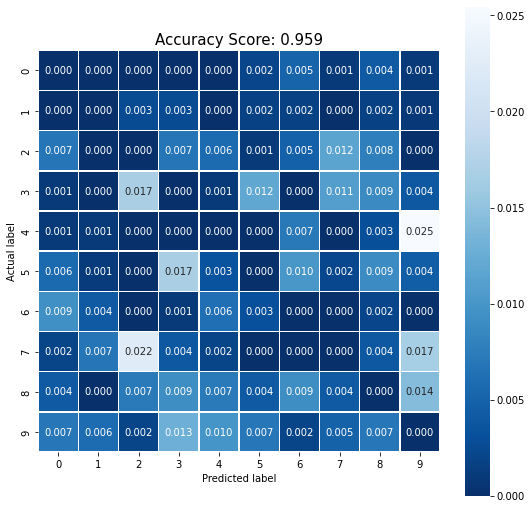

In [ ]:

plt.figure(figsize=(9,9))
np.fill_diagonal(cm_normalized,0)

sns.heatmap(cm_normalized,0, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy) 
plt.title(all_sample_title, size = 15)

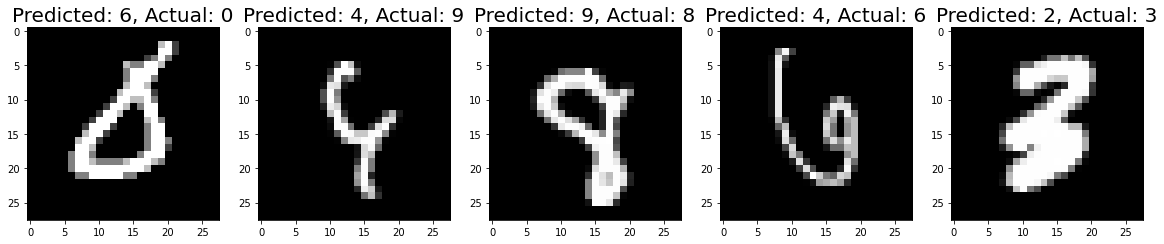

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(pd.Series(misclassifiedIndexes).sample(5)):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test.values[badIndex]), fontsize = 20)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.114725 to fit


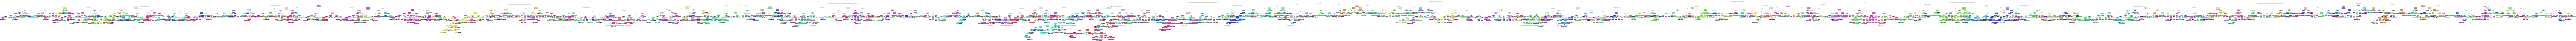

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf.estimators_[99],
                           feature_names= x_test.columns,
                           class_names=y_test.astype("str").unique(), 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)